In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
db_mon = pd.read_csv('mon.csv')
db_med = pd.read_csv('med.csv')

age = pd.read_excel('/media/Data/Lab_Projects/Aging/aging_session_log.xlsx', sheet_name='scans').iloc[:, [1,7,8]]
age.columns.values[0] = "sub"
age['sub'] = age['sub'].map(lambda x: int(x.lstrip('AG_')))

In [21]:
choices = db_mon[['sub','choice']].groupby(['sub']).sum()
too_risk_averse = list(choices[choices['choice']<10].index)

db_mon = db_mon[~db_mon['sub'].isin(too_risk_averse)]
too_risk_averse

[11, 14, 16, 40, 50, 65]

In [22]:
choices = db_med[['sub','choice']].groupby(['sub']).sum()
too_risk_averse = list(choices[choices['choice']<10].index)

db_med = db_med[~db_med['sub'].isin(too_risk_averse)]
too_risk_averse

[11, 65]

In [23]:
mon_s = list(db_mon['sub'].unique())
med_s = list(db_med['sub'].unique())

db_mon = db_mon[db_mon['sub'].isin(med_s)]
db_med = db_med[db_med['sub'].isin(mon_s)]

age = age[age['sub'].isin(list(db_mon['sub'].unique()))]

#list(np.setdiff1d(db_med['sub'].unique(),db_mon['sub'].unique()))

print('n =', len(db_med['sub'].unique()))

n = 43


In [26]:
mon_risk = db_mon[db_mon['ambiguity'] == 0][['sub','value','choice']]
mon_amb  = db_mon[db_mon['ambiguity'] >  0][['sub','value','choice']]

med_risk = db_med[db_med['ambiguity'] == 0][['sub','value','choice']]
med_amb  = db_med[db_med['ambiguity'] >  0][['sub','value','choice']]


In [27]:
mon_prop_r = mon_risk.groupby(['sub','value']).sum()/mon_risk.groupby(['sub','value']).count()
mon_prop_a = mon_amb.groupby(['sub','value']).sum()/mon_amb.groupby(['sub','value']).count()
med_prop_r = med_risk.groupby(['sub','value']).sum()/med_risk.groupby(['sub','value']).count()
med_prop_a = med_amb.groupby(['sub','value']).sum()/med_amb.groupby(['sub','value']).count()

mon_prop_r.reset_index(inplace=True)
mon_prop_a.reset_index(inplace=True)
med_prop_r.reset_index(inplace=True)
med_prop_a.reset_index(inplace=True)

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 [Text(0, 0, 'Slight'),
  Text(1, 0, 'Moderate'),
  Text(2, 0, 'Major'),
  Text(3, 0, 'Recovery')],
 Text(0.5, 1.0, 'Medical Ambiguity')]

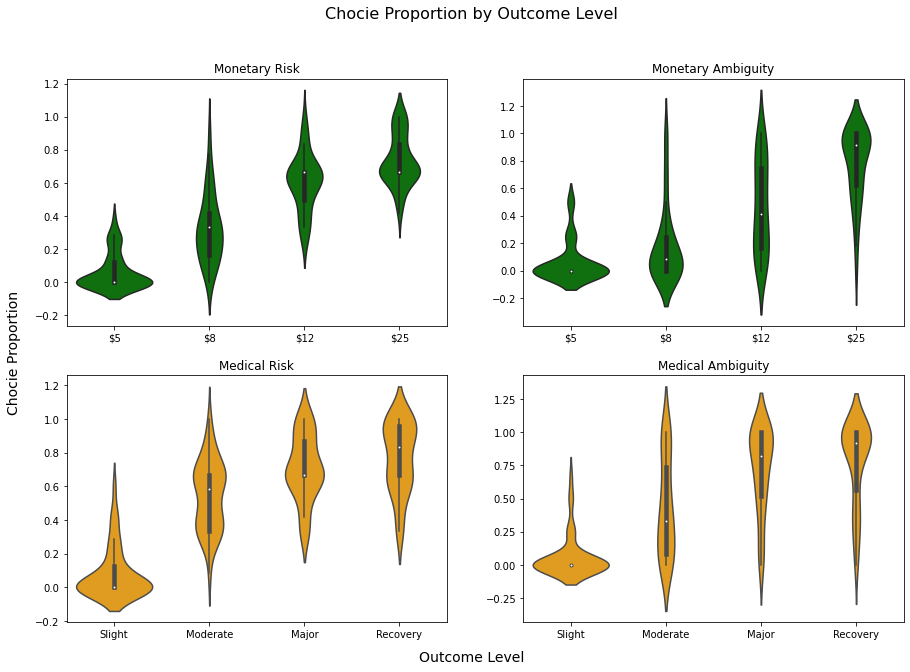

In [28]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Chocie Proportion by Outcome Level', fontsize=16)

fig.text(0.5, 0.07, 'Outcome Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'Chocie Proportion', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

sns.violinplot(x = 'value', y = 'choice', data = mon_prop_r , ax = ax1, color='green')
sns.violinplot(x = 'value', y = 'choice', data = mon_prop_a , ax = ax2, color='green')
sns.violinplot(x = 'value', y = 'choice', data = med_prop_r , ax = ax3, color='orange')
sns.violinplot(x = 'value', y = 'choice', data = med_prop_a , ax = ax4, color='orange')

ax1.set(xlabel=None, ylabel=None, xticklabels=['$5','$8','$12','$25'], title='Monetary Risk')
ax2.set(xlabel=None, ylabel=None, xticklabels=['$5','$8','$12','$25'], title='Monetary Ambiguity')
ax3.set(xlabel=None, ylabel=None, xticklabels=['Slight','Moderate','Major','Recovery'], title='Medical Risk')
ax4.set(xlabel=None, ylabel=None, xticklabels=['Slight','Moderate','Major','Recovery'], title='Medical Ambiguity')


In [29]:
mon_risk_unc = db_mon[db_mon['ambiguity'] == 0][['sub','risk','choice']]
mon_amb_unc  = db_mon[db_mon['ambiguity'] >  0][['sub','ambiguity','choice']]

med_risk_unc = db_med[db_med['ambiguity'] == 0][['sub','risk','choice']]
med_amb_unc  = db_med[db_med['ambiguity'] >  0][['sub','ambiguity','choice']]

In [30]:
mon_prop_unc_r = mon_risk_unc.groupby(['sub','risk']).sum()/mon_risk_unc.groupby(['sub','risk']).count()
mon_prop_unc_a = mon_amb_unc.groupby(['sub','ambiguity']).sum()/mon_amb_unc.groupby(['sub','ambiguity']).count()
med_prop_unc_r = med_risk_unc.groupby(['sub','risk']).sum()/med_risk_unc.groupby(['sub','risk']).count()
med_prop_unc_a = med_amb_unc.groupby(['sub','ambiguity']).sum()/med_amb_unc.groupby(['sub','ambiguity']).count()

mon_prop_unc_r.reset_index(inplace=True)
mon_prop_unc_a.reset_index(inplace=True)
med_prop_unc_r.reset_index(inplace=True)
med_prop_unc_a.reset_index(inplace=True)

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 [Text(0, 0, '24%'), Text(1, 0, '50%'), Text(2, 0, '74%')],
 Text(0.5, 1.0, 'Medical Ambiguity')]

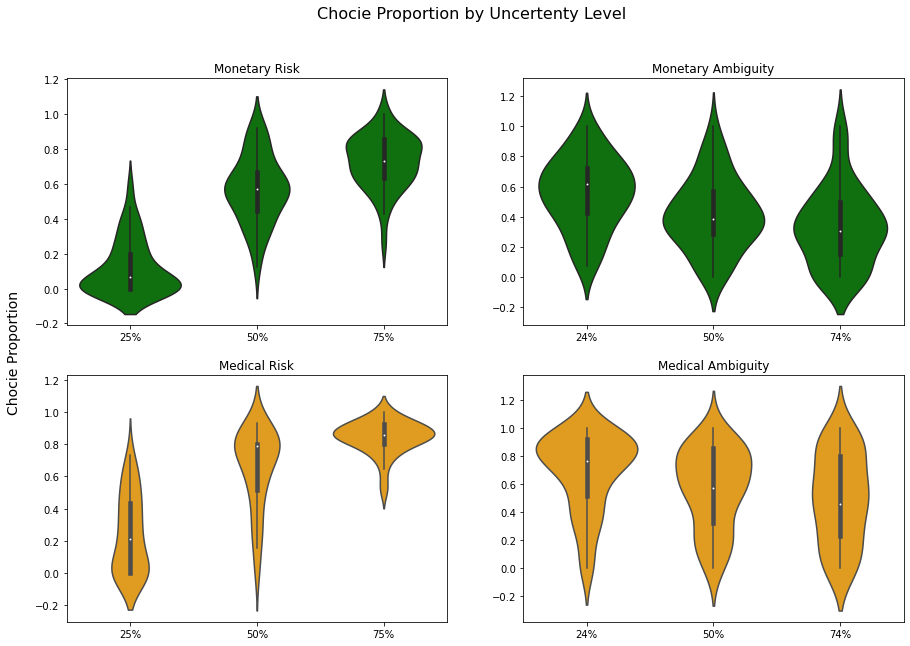

In [31]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Chocie Proportion by Uncertenty Level', fontsize=16)

#fig.text(0.5, 0.07, 'Outcome Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'Chocie Proportion', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

sns.violinplot(x = 'risk', y = 'choice', data = mon_prop_unc_r , ax = ax1, color='green')
sns.violinplot(x = 'ambiguity', y = 'choice', data = mon_prop_unc_a , ax = ax2, color='green')
sns.violinplot(x = 'risk', y = 'choice', data = med_prop_unc_r , ax = ax3, color='orange')
sns.violinplot(x = 'ambiguity', y = 'choice', data = med_prop_unc_a , ax = ax4, color='orange')

ax1.set(xlabel=None, ylabel=None, xticklabels=['25%','50%','75%'], title='Monetary Risk')
ax2.set(xlabel=None, ylabel=None, xticklabels=['24%','50%','74%'], title='Monetary Ambiguity')
ax3.set(xlabel=None, ylabel=None, xticklabels=['25%','50%','75%'], title='Medical Risk')
ax4.set(xlabel=None, ylabel=None, xticklabels=['24%','50%','74%'], title='Medical Ambiguity')


In [32]:
mon_risk_prop = db_mon[(db_mon.choice == 1) & (db_mon.ambiguity == 0)].groupby('sub').count()['choice']/db_mon[(db_mon.ambiguity == 0)].groupby('sub').count()['choice']
mon_ambg_prop = db_mon[(db_mon.choice == 1) & (db_mon.ambiguity >  0)].groupby('sub').count()['choice']/db_mon[(db_mon.ambiguity >  0)].groupby('sub').count()['choice']

med_risk_prop = db_med[(db_med.choice == 1) & (db_med.ambiguity == 0)].groupby('sub').count()['choice']/db_med[(db_med.ambiguity == 0)].groupby('sub').count()['choice']
med_ambg_prop = db_med[(db_med.choice == 1) & (db_med.ambiguity >  0)].groupby('sub').count()['choice']/db_med[(db_med.ambiguity >  0)].groupby('sub').count()['choice']

In [33]:
prop = pd.DataFrame({'mon_risk' : mon_risk_prop,
                     'mon_ambg' : mon_ambg_prop,
                     'med_risk' : med_risk_prop,
                     'med_ambg' : med_ambg_prop})
prop = prop.fillna(0)

In [34]:
corRisk = sp.stats.pearsonr(prop.mon_risk, prop.med_risk)
corAmb = sp.stats.pearsonr(prop.mon_ambg, prop.med_ambg)
corMon = sp.stats.pearsonr(prop.mon_risk, prop.mon_ambg)
corMed = sp.stats.pearsonr(prop.med_risk, prop.med_ambg)

print('corRisk: ', corRisk, 'corAmb ', corAmb, 'corMon ', corMon, 'corMed ', corMed)

corRisk:  (0.3711418677340286, 0.014275880126535316) corAmb  (0.6428135886761379, 3.3524422020000892e-06) corMon  (0.6454694974640317, 2.9626495762506287e-06) corMed  (0.7651729672000043, 2.299985215480333e-09)


[Text(0.5, 0, 'Choice Proportion'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Ambiguous Trials')]

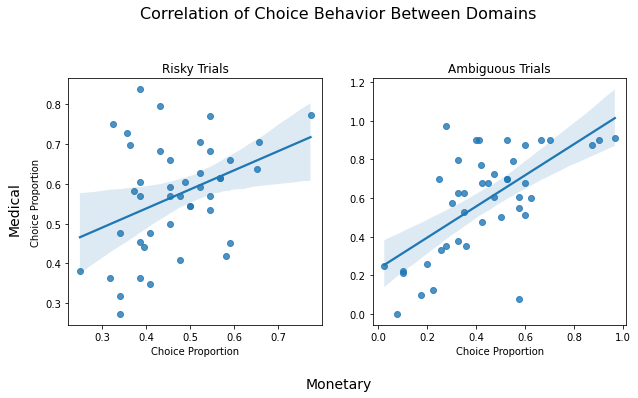

In [35]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Correlation of Choice Behavior Between Domains', fontsize=16)

fig.text(0.5, 0.45, 'Monetary', ha='center', fontsize=14)
fig.text(0.04, 0.7, 'Medical', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)    

sns.regplot(x='mon_risk',y='med_risk',data=prop,ax=ax1)
sns.regplot(x='mon_ambg',y='med_ambg',data=prop,ax=ax2)

ax1.set(xlabel='Choice Proportion', ylabel='Choice Proportion', title='Risky Trials')
ax2.set(xlabel='Choice Proportion', ylabel=None, title='Ambiguous Trials')


[Text(0.5, 0, 'Choice Proportion'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Medical')]

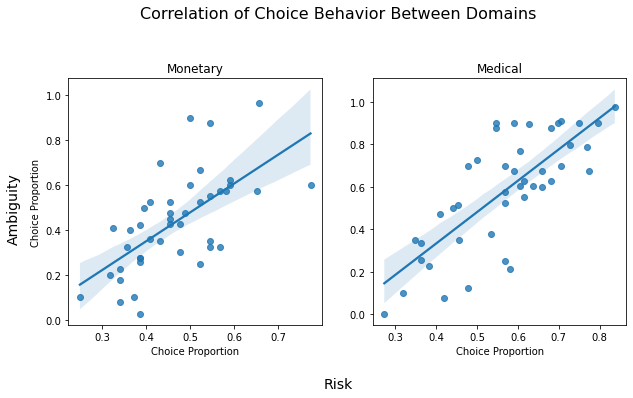

In [36]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Correlation of Choice Behavior Between Domains', fontsize=16)

fig.text(0.5, 0.45, 'Risk', ha='center', fontsize=14)
fig.text(0.04, 0.7, 'Ambiguity', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)   

sns.regplot(x='mon_risk',y='mon_ambg',data=prop,ax=ax1)
sns.regplot(x='med_risk',y='med_ambg',data=prop,ax=ax2)
#sns.regplot(x='mon_risk',y='mon_ambg',data=prop,ax=ax3)
#sns.regplot(x='med_risk',y='med_ambg',data=prop,ax=ax2)

ax1.set(xlabel='Choice Proportion', ylabel='Choice Proportion', title='Monetary')
ax2.set(xlabel='Choice Proportion', ylabel=None, title='Medical')
